Data Loading and Pre Processing

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/top_insta_influencers_data.csv')

In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB
None
             rank  influence_score
count  200.000000       200.000000
mean   100.500000        81.820000
std     57.879185         8.878159
min      1.000000        22.000000
25%     50.750000        80.000000
50%    100.500000        84.000000
75%    150.250000        86.00

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)


/tmp/ipython-input-3189065506.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
/tmp/ipython-input-3189065506.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [6]:
for col in ['followers', 'posts', 'total_likes']:
    df[col] = (df[col].astype(str)
               .str.lower()
               .str.replace(',', '', regex=True)
               .str.replace('k', 'e3', regex=True)
               .str.replace('m', 'e6', regex=True)
               .str.replace('b', 'e9', regex=True))
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

In [7]:
print(df[['influence_score','followers','avg_likes','60_day_eng_rate','new_post_avg_like']].describe())


       influence_score     followers
count       200.000000  2.000000e+02
mean         81.820000  7.740950e+07
std           8.878159  7.368727e+07
min          22.000000  3.280000e+07
25%          80.000000  4.000000e+07
50%          84.000000  5.005000e+07
75%          86.000000  6.890000e+07
max          93.000000  4.758000e+08


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

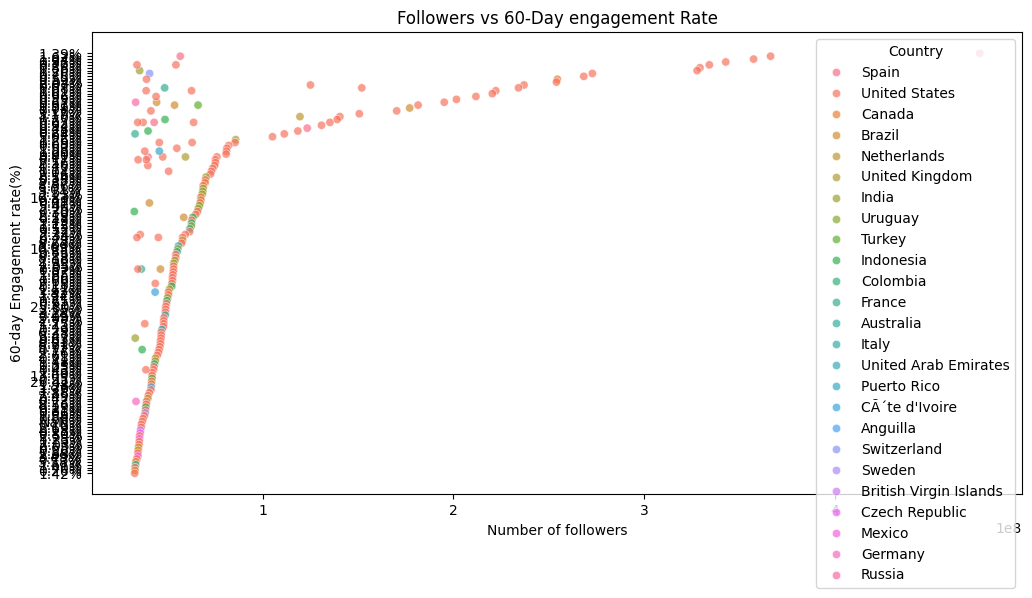

In [9]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='followers',y='60_day_eng_rate',hue='country',alpha=0.7)
plt.title('Followers vs 60-Day engagement Rate')
plt.xlabel('Number of followers')
plt.ylabel('60-day Engagement rate(%)')
plt.legend(title='Country')
plt.show()


Distribution of Score

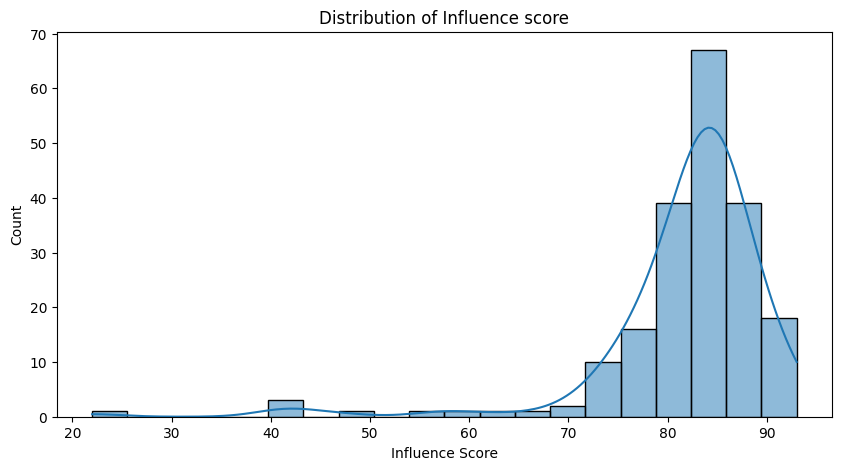

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(df['influence_score'],bins=20,kde=True)
plt.title('Distribution of Influence score')
plt.xlabel('Influence Score')
plt.show()

Most Active Countries

/tmp/ipython-input-3479488516.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index,y=top_countries.values,palette="viridis")


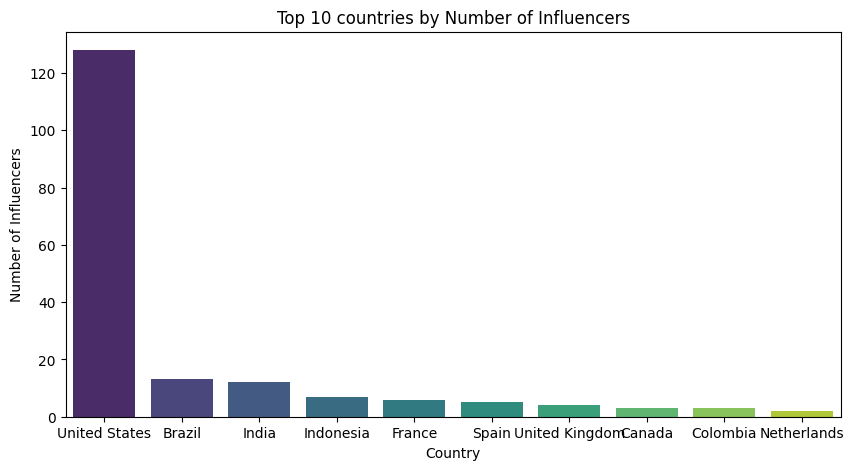

In [11]:
top_countries=df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index,y=top_countries.values,palette="viridis")
plt.title('Top 10 countries by Number of Influencers')
plt.xlabel('Country')
plt.ylabel('Number of Influencers')
plt.show()

In [12]:
df['avg_likes'] = (df['avg_likes'].astype(str)
               .str.lower()
               .str.replace(',', '', regex=True)
               .str.replace('k', 'e3', regex=True)
               .str.replace('m', 'e6', regex=True)
               .str.replace('b', 'e9', regex=True))
df['avg_likes'] = pd.to_numeric(df['avg_likes'], errors='coerce').fillna(0)

In [13]:
df['like_follower_ratio'] = df['total_likes'] / df['followers']
df['post_follower_ratio'] = df['posts'] / df['followers']
df['avg_likes_ratio'] = df['avg_likes'] / df['followers']


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
for col in ['60_day_eng_rate']:
    df[col] = (df[col].astype(str)
               .str.replace('%', '', regex=True))
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

for col in ['new_post_avg_like']:
    df[col] = (df[col].astype(str)
               .str.lower()
               .str.replace(',', '', regex=True)
               .str.replace('k', 'e3', regex=True)
               .str.replace('m', 'e6', regex=True)
               .str.replace('b', 'e9', regex=True))
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

X=df[['followers','avg_likes','60_day_eng_rate','new_post_avg_like','like_follower_ratio','post_follower_ratio']]
y=df['influence_score']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size=0.2, random_state=42)

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
model = RandomForestRegressor(n_estimators=100,
 random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [30]:
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [31]:
print(f'Mean squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean squared Error: 170.96173750000003
R^2 Score: -0.01119281655829174


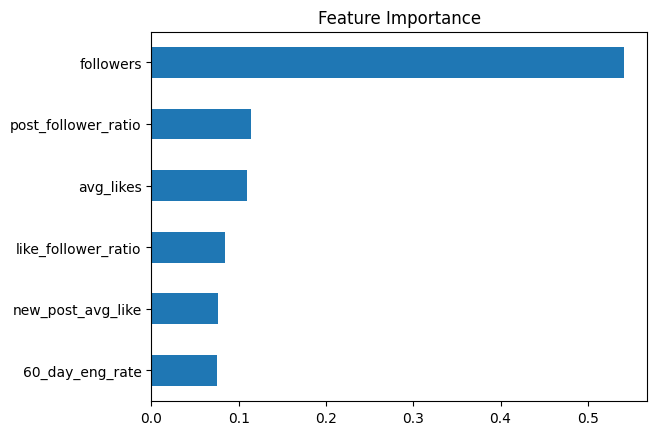

In [32]:
feature_importances = pd.Series(model.feature_importances_,index=X.columns)
feature_importances.sort_values().plot(kind='barh',title='Feature Importance')
plt.show()

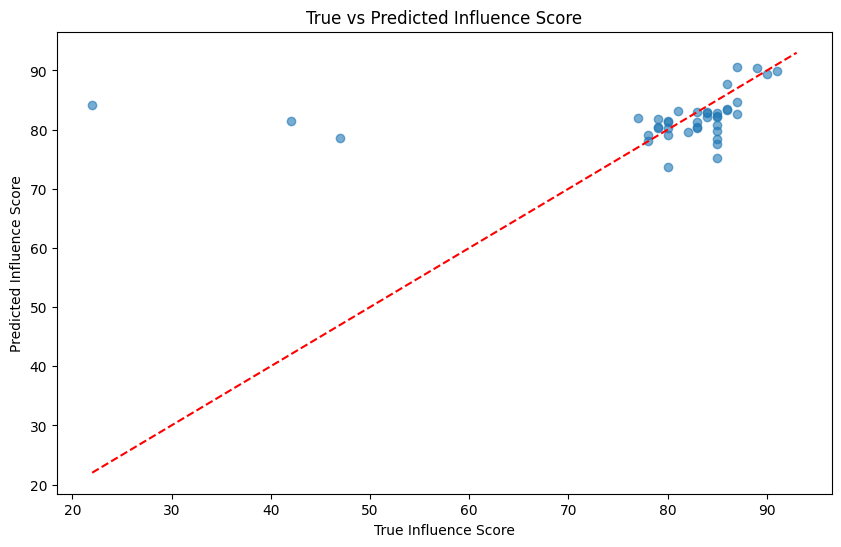

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--',
color='red')
plt.xlabel('True Influence Score')
plt.ylabel('Predicted Influence Score')
plt.title('True vs Predicted Influence Score')
plt.show()

In [39]:
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [37]:
print(f'Mean squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean squared Error: 170.96173750000003
R^2 Score: -0.01119281655829174


In [40]:
dictionary={'Names':["Alice","Oggy","Modi","SRK","TOnyStark"],"Marks":[10,12,15,18,20]}
df=pd.DataFrame(dictionary)
df.head()

,Names,Marks
0,Alice,10
1,Oggy,12
2,Modi,15
3,SRK,18
4,TOnyStark,20


In [41]:
print(df['Names'])

0        Alice
1         Oggy
2         Modi
3          SRK
4    TOnyStark
Name: Names, dtype: object


In [42]:
print(df.loc[3])

Names    SRK
Marks     18
Name: 3, dtype: object


In [43]:
insta_df=pd.read_csv('/content/top_insta_influencers_data.csv')
print('Dataset is Ready to use')


Dataset is Ready to use


In [44]:
insta_df.head(25)

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
5,6,kimkardashian,91,5.6k,329.2m,3.5m,0.88%,2.9m,19.9b,United States
6,7,arianagrande,92,5.0k,327.7m,3.7m,1.20%,3.9m,18.4b,United States
7,8,beyonce,92,2.0k,272.8m,3.6m,0.76%,2.0m,7.4b,United States
8,9,khloekardashian,89,4.1k,268.3m,2.4m,0.35%,926.9k,9.8b,United States
9,10,justinbieber,91,7.4k,254.5m,1.9m,0.59%,1.5m,13.9b,Canada


In [45]:
insta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


In [46]:
insta_df.shape

(200, 10)

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
country=insta_df['country'].value_counts()

In [49]:
country

,count
country,
United States,66
Brazil,13
India,12
Indonesia,7
France,6
Spain,5
United Kingdom,4
Canada,3
Colombia,3


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'Spain'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'Brazil'),
  Text(4, 0, 'Netherlands'),
  Text(5, 0, 'United Kingdom'),
  Text(6, 0, 'India'),
  Text(7, 0, 'Uruguay'),
  Text(8, 0, 'Turkey'),
  Text(9, 0, 'Indonesia'),
  Text(10, 0, 'Colombia'),
  Text(11, 0, 'France'),
  Text(12, 0, 'Australia'),
  Text(13, 0, 'Italy'),
  Text(14, 0, 'United Arab Emirates'),
  Text(15, 0, 'Puerto Rico'),
  Text(16, 0, "CÃ´te d'Ivoire"),
  Text(17, 0, 'Anguilla'),
  Text(18, 0, 'Switzerland'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'British Virgin Islands'),
  Text(21, 0, 'Czech Republic'),
  Text(22, 0, 'Mexico'),
  Text(23, 0, 'Germany'),
  Text(24, 0, 'Russia')])

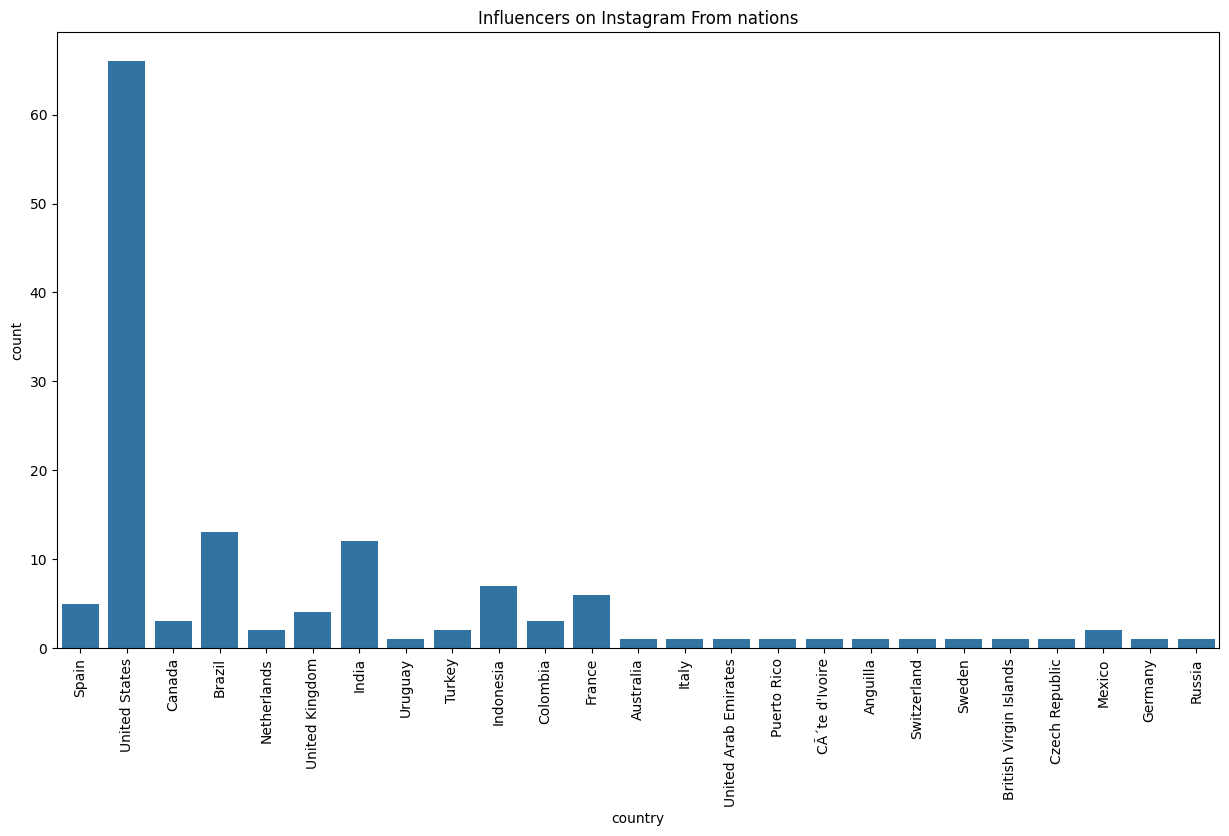

In [50]:
plt.figure(figsize=(15,8))
plt.title('Influencers on Instagram From nations')
sns.countplot(x=insta_df["country"])
plt.xticks(rotation=90)

In [51]:
insta_df.duplicated().sum()

np.int64(0)

In [52]:
insta_df.describe()

,rank,influence_score
count,200.000000,200.000000
mean,100.500000,81.820000
std,57.879185,8.878159
min,1.000000,22.000000
25%,50.750000,80.000000
50%,100.500000,84.000000
75%,150.250000,86.000000
max,200.000000,93.000000


In [53]:
insta_df[['channel_info','followers','60_day_eng_rate']]

,channel_info,followers,60_day_eng_rate
0,cristiano,475.8m,1.39%
1,kyliejenner,366.2m,1.62%
2,leomessi,357.3m,1.24%
3,selenagomez,342.7m,0.97%
4,therock,334.1m,0.20%
...,...,...,...
195,iambeckyg,33.2m,1.40%
196,nancyajram,33.2m,0.64%
197,luansantana,33.2m,0.26%
198,nickjonas,33.0m,1.42%


In [54]:
replace={'b': 'e9','m': 'e6','k': 'e3', '%': ''}
convert_column=['total_likes','posts','followers','avg_likes','60_day_eng_rate','new_post_avg_like']
insta_df[convert_column]=insta_df[convert_column].replace(replace,regex=True).astype(float)
insta_df[convert_column]

,total_likes,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like
0,2.900000e+10,3300.0,475800000.0,8700000.0,1.39,6500000.0
1,5.740000e+10,6900.0,366200000.0,8300000.0,1.62,5900000.0
2,6.000000e+09,890.0,357300000.0,6800000.0,1.24,4400000.0
3,1.150000e+10,1800.0,342700000.0,6200000.0,0.97,3300000.0
4,1.250000e+10,6800.0,334100000.0,1900000.0,0.20,665300.0
...,...,...,...,...,...,...
195,1.400000e+09,2300.0,33200000.0,623800.0,1.40,464700.0
196,1.500000e+09,3800.0,33200000.0,390400.0,0.64,208000.0
197,1.492000e+08,770.0,33200000.0,193300.0,0.26,82600.0
198,1.700000e+09,2300.0,33000000.0,719600.0,1.42,467700.0


In [55]:
high_follower_df=insta_df[insta_df['followers']>1_000_000]
high_follower_df

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,Spain
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10,United States
2,3,leomessi,90,890.0,357300000.0,6800000.0,1.24,4400000.0,6.000000e+09,NaN
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10,United States
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2300.0,33200000.0,623800.0,1.40,464700.0,1.400000e+09,United States
196,197,nancyajram,81,3800.0,33200000.0,390400.0,0.64,208000.0,1.500000e+09,France
197,198,luansantana,79,770.0,33200000.0,193300.0,0.26,82600.0,1.492000e+08,Brazil
198,199,nickjonas,78,2300.0,33000000.0,719600.0,1.42,467700.0,1.700000e+09,United States


In [56]:
high_engagement_df=insta_df[insta_df['60_day_eng_rate']>5]
high_engagement_df

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
32,33,billieeilish,73,690.0,105200000.0,8500000.0,5.02,5200000.0,5.900000e+09,NaN
38,39,lalalalisa_m,70,870.0,80900000.0,5800000.0,9.00,7200000.0,5.100000e+09,NaN
49,50,jennierubyjane,76,860.0,68900000.0,5100000.0,8.36,5700000.0,4.400000e+09,NaN
53,54,tomholland2013,77,1200.0,67700000.0,5400000.0,10.83,7300000.0,6.600000e+09,NaN
56,57,bts.bighitofficial,78,1200.0,66900000.0,4100000.0,5.40,3600000.0,4.900000e+09,Uruguay
64,65,sooyaaa__,82,830.0,62900000.0,4500000.0,9.43,5900000.0,3.800000e+09,NaN
69,70,roses_are_rosie,82,820.0,61800000.0,4600000.0,9.72,6000000.0,3.800000e+09,NaN
75,76,milliebobbybrown,80,280.0,57600000.0,4000000.0,8.63,5000000.0,1.100000e+09,United States
78,79,karolg,83,3300.0,55600000.0,3100000.0,10.25,5700000.0,1.010000e+10,India
83,84,zacefron,86,660.0,54500000.0,2300000.0,8.18,4400000.0,1.500000e+09,United States


In [57]:
top10_er = insta_df.drop(["rank","influence_score","avg_likes","new_post_avg_like","total_likes","country"],axis=1)
top10_er.head(10)

,channel_info,posts,followers,60_day_eng_rate
0,cristiano,3300.0,475800000.0,1.39
1,kyliejenner,6900.0,366200000.0,1.62
2,leomessi,890.0,357300000.0,1.24
3,selenagomez,1800.0,342700000.0,0.97
4,therock,6800.0,334100000.0,0.20
5,kimkardashian,5600.0,329200000.0,0.88
6,arianagrande,5000.0,327700000.0,1.20
7,beyonce,2000.0,272800000.0,0.76
8,khloekardashian,4100.0,268300000.0,0.35
9,justinbieber,7400.0,254500000.0,0.59


In [58]:
replace={'b': 'e9','m':'e6','k': 'e3','%': ''}
converted_data=top10_er['60_day_eng_rate'].replace(replace,regex=True).astype(float)
converted_data.head()



,60_day_eng_rate
0,1.39
1,1.62
2,1.24
3,0.97
4,0.20


In [59]:
insta_df.isnull().sum

<bound method DataFrame.sum of       rank  channel_info  influence_score  posts  followers  avg_likes  \
0    False         False            False  False      False      False   
1    False         False            False  False      False      False   
2    False         False            False  False      False      False   
3    False         False            False  False      False      False   
4    False         False            False  False      False      False   
..     ...           ...              ...    ...        ...        ...   
195  False         False            False  False      False      False   
196  False         False            False  False      False      False   
197  False         False            False  False      False      False   
198  False         False            False  False      False      False   
199  False         False            False  False      False      False   

     60_day_eng_rate  new_post_avg_like  total_likes  country  
0              False              False        False    False  
1              False              False        False    False  
2              False              False        False     True  
3              False              False        False    False  
4              False              False        False    False  
..               ...                ...          ...      ...  
195            False              False        False    False  
196            False              False        False    False  
197            False              False        False    False  
198            False              False        False    False  
199            False              False        False    False  

[200 rows x 10 columns]>

In [60]:
insta_df['60_day_eng_rate'].fillna(insta_df['60_day_eng_rate'].mean(),inplace=True)


/tmp/ipython-input-2114021180.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  insta_df['60_day_eng_rate'].fillna(insta_df['60_day_eng_rate'].mean(),inplace=True)


In [61]:
insta_df.dropna(inplace=True)
print("Data Cleaned")

Data Cleaned


In [62]:
country=insta_df['country'].value_counts()[:20].to_list()
name_countries=insta_df['country'].value_counts().index[:20].to_list()
name_countries.append("Others")
max20=sum(country)
others=len(insta_df)-max20
country.append(others)

/tmp/ipython-input-487942766.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country,y=name_countries,palette='viridis')


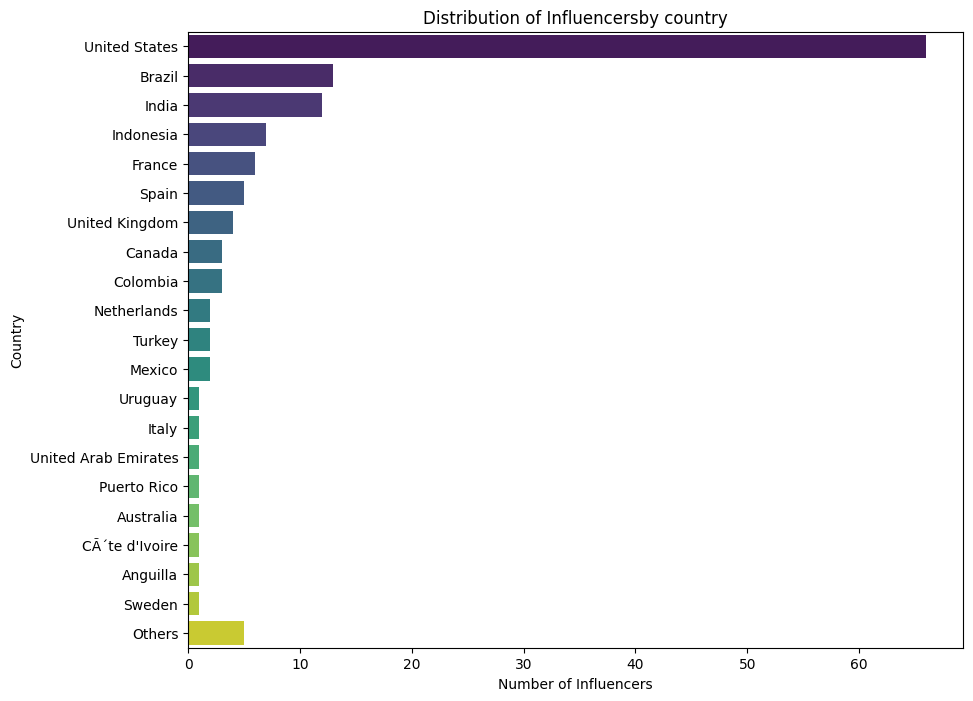

In [63]:
plt.figure(figsize=(10,8))
sns.barplot(x=country,y=name_countries,palette='viridis')
plt.title('Distribution of Influencersby country')
plt.xlabel('Number of Influencers')
plt.ylabel('Country')
plt.show()

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [67]:
features=insta_df[['followers','influence_score','country']]
target=insta_df['60_day_eng_rate']


In [68]:
encoder=LabelEncoder()
features['country_encoded']=encoder.fit_transform(features['country'])
print("Encoding Completed")

Encoding Completed


/tmp/ipython-input-1089371502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['country_encoded']=encoder.fit_transform(features['country'])


In [70]:
features=features[['followers','influence_score','country_encoded']]

In [69]:
features

,followers,influence_score,country,country_encoded
0,475800000.0,92,Spain,17
1,366200000.0,91,United States,23
3,342700000.0,93,United States,23
4,334100000.0,91,United States,23
5,329200000.0,91,United States,23
...,...,...,...,...
195,33200000.0,71,United States,23
196,33200000.0,81,France,8
197,33200000.0,79,Brazil,2
198,33000000.0,78,United States,23


In [71]:
X_train, X_test,y_train,y_test=train_test_split(features,
target,test_size=0.1,random_state=42)

In [72]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
print("Training Completed")

Training Completed


In [73]:
rf_model = RandomForestRegressor(n_estimators=100,
                                 random_state=42)
rf_model.fit(X_train, y_train)
print("Training Completed")

Training Completed


In [75]:
lr_preds=lr_model.predict(X_test)
rf_preds=rf_model.predict(X_test)

In [76]:
lr_preds

array([1.37028635, 1.30255527, 1.01603073, 1.49674945, 1.12804654,
       1.37867911, 1.38950008, 1.32829439, 1.45159326, 1.39365706,
       1.40583913, 1.28780069, 1.42115805, 1.54741186])

In [78]:
lr_mse=mean_squared_error(y_test,lr_preds)
rf_mse=mean_squared_error(y_test,rf_preds)

In [79]:
print("Linear Regression MSE:",lr_mse)
print("Random Forest MSE:",rf_mse)

Linear Regression MSE: 4.590033513452199
Random Forest MSE: 5.705781945000001


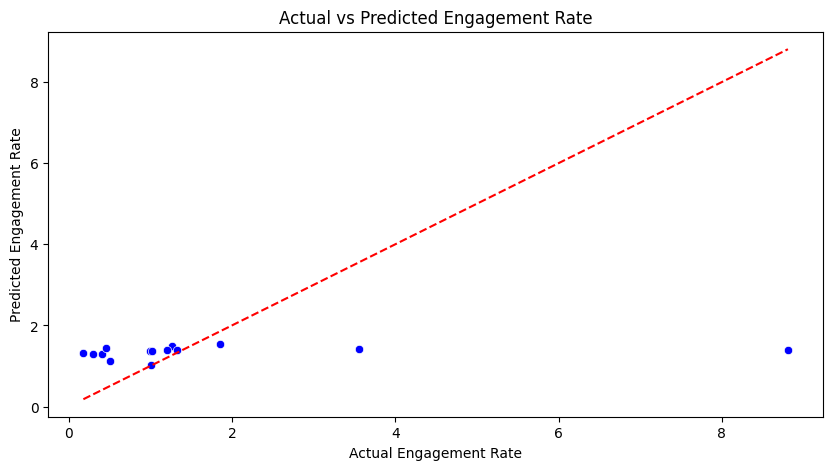

In [80]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test,y=lr_preds,color='blue')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.xlabel("Actual Engagement Rate")
plt.ylabel("Predicted Engagement Rate")
plt.title("Actual vs Predicted Engagement Rate")
plt.show()

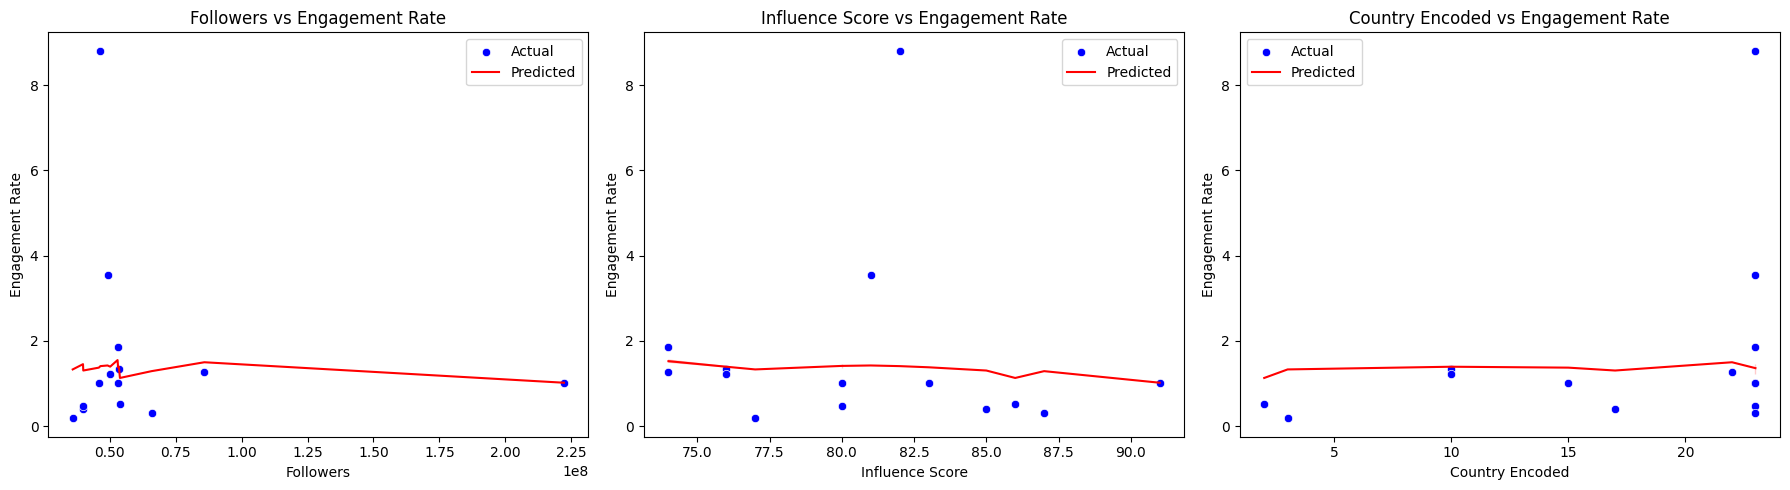

In [81]:
fig,axes=plt.subplots(1,3,figsize=(18,5))
sns.scatterplot(ax=axes[0], x=X_test['followers'], y=y_test, label="Actual", color='blue')
sns.lineplot(ax=axes[0], x=X_test['followers'], y=lr_model.predict(X_test), label="Predicted", color='Red')
axes[0].set_title("Followers vs Engagement Rate")
axes[0].set_xlabel("Followers")
axes[0].set_ylabel("Engagement Rate")
sns.scatterplot(ax=axes[1], x=X_test['influence_score'],
y=y_test, label="Actual", color='blue')
sns.lineplot(ax=axes[1], x=X_test['influence_score'],
y=lr_model.predict(X_test), label="Predicted", color='red')
axes[1].set_title("Influence Score vs Engagement Rate")
axes[1].set_xlabel("Influence Score")
axes[1].set_ylabel("Engagement Rate")
sns.scatterplot(ax=axes[2], x=X_test['country_encoded'],
y=y_test, label="Actual", color='blue')
sns.lineplot(ax=axes[2], x=X_test['country_encoded'],
y=lr_model.predict(X_test), label="Predicted", color='red')
axes[2].set_title("Country Encoded vs Engagement Rate")
axes[2].set_xlabel("Country Encoded")
axes[2].set_ylabel("Engagement Rate")
plt.tight_layout()
plt.show()

In [82]:
predictions_df=X_test.copy()
predictions_df['Actual Engagement Rate']=y_test.values
predictions_df['Predicted Engagement Rate']=lr_preds


In [83]:
predictions_df.head()

,followers,influence_score,country_encoded,Actual Engagement Rate,Predicted Engagement Rate
122,45900000.0,80,15,1.00,1.370286
149,40000000.0,85,17,0.41,1.302555
13,222200000.0,91,23,1.01,1.016031
33,85900000.0,74,22,1.26,1.496749
85,53900000.0,86,2,0.51,1.128047


In [84]:
insta_df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,Spain
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10,United States
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10,United States
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10,United States
5,6,kimkardashian,91,5600.0,329200000.0,3500000.0,0.88,2900000.0,1.990000e+10,United States


In [85]:
bins=[0,1,3,insta_df['60_day_eng_rate'].max()]
labels=['Low','Medium','High']
insta_df['engagement_rate_class']=pd.cut(insta_df['60_day_eng_rate'],bins=bins,labels=labels)
insta_df.head(20)

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country,engagement_rate_class
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,Spain,Medium
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10,United States,Medium
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10,United States,Low
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10,United States,Low
5,6,kimkardashian,91,5600.0,329200000.0,3500000.0,0.88,2900000.0,1.990000e+10,United States,Low
6,7,arianagrande,92,5000.0,327700000.0,3700000.0,1.20,3900000.0,1.840000e+10,United States,Medium
7,8,beyonce,92,2000.0,272800000.0,3600000.0,0.76,2000000.0,7.400000e+09,United States,Low
8,9,khloekardashian,89,4100.0,268300000.0,2400000.0,0.35,926900.0,9.800000e+09,United States,Low
9,10,justinbieber,91,7400.0,254500000.0,1900000.0,0.59,1500000.0,1.390000e+10,Canada,Low
10,11,kendalljenner,90,660.0,254000000.0,5500000.0,2.04,5100000.0,3.700000e+09,United States,Medium


In [86]:
high_engagement_df=insta_df[insta_df['engagement_rate_class']=='High']
high_engagement_df

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country,engagement_rate_class
22,23,zendaya,87,3500.0,150700000.0,5800000.0,3.17,4800000.0,2.060000e+10,United States,High
50,51,narendramodi,85,540.0,68900000.0,2900000.0,3.01,2000000.0,1.600000e+09,India,High
51,52,aliaabhatt,82,1800.0,68700000.0,1800000.0,3.14,2100000.0,3.300000e+09,India,High
56,57,bts.bighitofficial,78,1200.0,66900000.0,4100000.0,5.40,3600000.0,4.900000e+09,Uruguay,High
75,76,milliebobbybrown,80,280.0,57600000.0,4000000.0,8.63,5000000.0,1.100000e+09,United States,High
77,78,chrishemsworth,86,880.0,55900000.0,2800000.0,3.69,2100000.0,2.500000e+09,Australia,High
78,79,karolg,83,3300.0,55600000.0,3100000.0,10.25,5700000.0,1.010000e+10,India,High
83,84,zacefron,86,660.0,54500000.0,2300000.0,8.18,4400000.0,1.500000e+09,United States,High
97,98,adele,84,420.0,50700000.0,4700000.0,3.82,1900000.0,2.000000e+09,United States,High
103,104,lelepons,81,2500.0,49200000.0,2400000.0,3.55,1700000.0,6.100000e+09,United States,High


In [87]:
encoder=LabelEncoder()
insta_df['country_encoded']=encoder.fit_transform(insta_df['country'])

In [88]:
features = insta_df[['followers', 'influence_score',
'country_encoded']]
target = insta_df['engagement_rate_class']

In [89]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)
print("TTS Completed")

TTS Completed


In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score

In [91]:
classifier=RandomForestClassifier(n_estimators=100,random_state=42)
classifier.fit(X_train,y_train)
print("Model trained")

Model trained


In [92]:
y_pred=classifier.predict(X_test)
y_pred

array(['Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low'], dtype=object)

In [93]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:"+str(float(accuracy)*100)+"%")
print("\nClassification Report:\n",classification_report(y_test,y_pred))

Accuracy:50.0%

Classification Report:
               precision    recall  f1-score   support

        High       0.00      0.00      0.00         4
         Low       0.50      1.00      0.67        13
      Medium       0.50      0.09      0.15        11

    accuracy                           0.50        28
   macro avg       0.33      0.36      0.27        28
weighted avg       0.43      0.50      0.37        28



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [94]:
from sklearn.metrics import confusion_matrix

In [95]:
conf_matrix=confusion_matrix(y_test,y_pred,labels=labels)

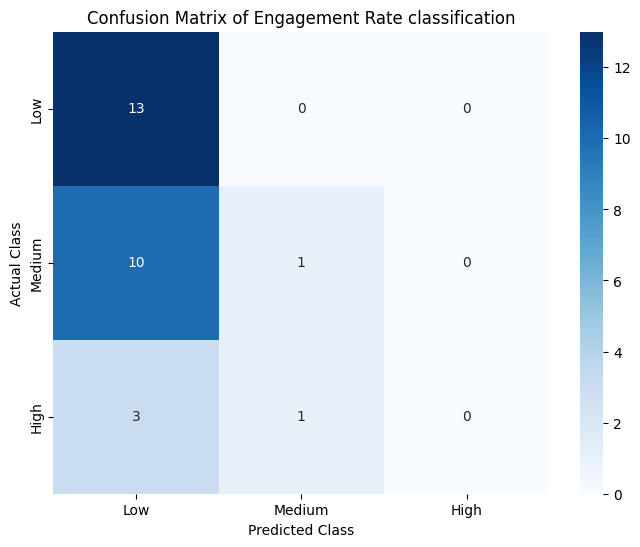

In [96]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix of Engagement Rate classification')
plt.show()

In [97]:
plt.figure(figsize=(10,5))


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

/tmp/ipython-input-128127343.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test,order=labels,palette="viridis")
/tmp/ipython-input-128127343.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred,order=labels,palette="viridis")


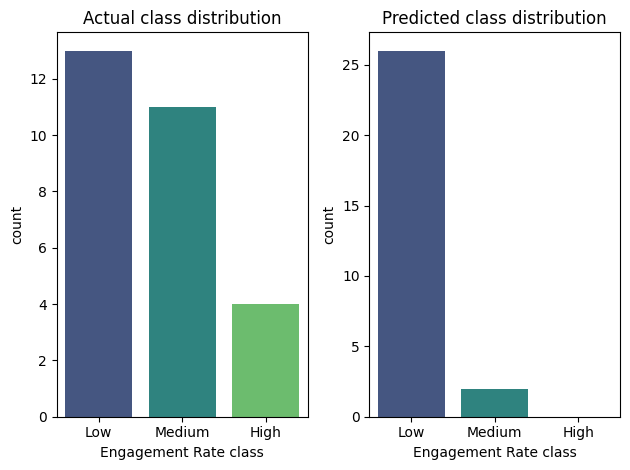

In [98]:
plt.subplot(1,2,1)
sns.countplot(x=y_test,order=labels,palette="viridis")
plt.title("Actual class distribution")
plt.xlabel("Engagement Rate class")
plt.ylabel("count")
plt.subplot(1,2,2)
sns.countplot(x=y_pred,order=labels,palette="viridis")
plt.title("Predicted class distribution")
plt.xlabel("Engagement Rate class")
plt.ylabel("count")
plt.tight_layout()
plt.show()